In [2]:
from dramlib import DRAMConfigFile
from dramlib.cnn_conv import CNNConv
from dramlib.iss.converter import Converter
from dramlib.dramsys.simulation import Dramsys
from dramlib.dramsys.parsing import Parser as DRAMParser
from dramlib.plotting import Plotter
from os.path import join
from os import listdir

folder = '/home/luismendes/DRAM-Research/test_1/'
input_files_folder = join(folder, 'params/')
input_files = [
  join(input_files_folder, file) 
  for file in listdir(input_files_folder)
]
paths_file = join(folder, 'paths_test_1.json')
paths_file, input_files

('/home/luismendes/DRAM-Research/test_1/paths_test_1.json',
 ['/home/luismendes/DRAM-Research/test_1/params/ram_size_test_1.json',
  '/home/luismendes/DRAM-Research/test_1/params/nrams_test_1.json',
  '/home/luismendes/DRAM-Research/test_1/params/line_size_test_1.json',
  '/home/luismendes/DRAM-Research/test_1/params/associativity_test_1.json'])

In [3]:
def start(input_file, path_file):
    dcf = DRAMConfigFile()
    dcf.start(input_file, path_file)
    default_file = dcf.save_defaults()
    main_file, file_list = dcf.save()
    return default_file, main_file, file_list

In [4]:
def run_cnn(file_path):
    dcf = DRAMConfigFile()
    dcf.read_config(file_path)
    data = dcf.get_cnn_data()

    path        = data['path_to_cnn_conv']
    app         = data['app']
    variable    = dcf.variable_map(data['variable'])
    value       = data['value']

    cnn = CNNConv(path, app)
    cnn.run(directives=f' {variable}={value}', debug=False)

In [5]:
def conv_trace(file_path):
    dcf = DRAMConfigFile()
    dcf.read_config(file_path)
    data = dcf.get_conv_data()

    dramsys_path    = data['path_to_dramsys']
    new_trace_file  = data['path_to_new_trace_file']
    old_trace_file  = data['path_to_old_trace_file']
    new_cfg_file    = data['path_to_new_cfg_file']
    old_cfg_file    = data['path_to_old_cfg_file']
    clkmhz          = data['clkMhz']

    conv = Converter(dramsys_path)
    burst_length = conv.conv(new_trace_file, old_trace_file)
    conv.create_new_config_file(
        old_cfg_file, 
        new_cfg_file, 
        new_trace_file, 
        burst_length, clkmhz
    )
    dcf.update_config_file_conv(file_path, burst_length)

In [6]:
def run_dramsys(file_path):
    dcf = DRAMConfigFile()
    dcf.read_config(file_path)
    data = dcf.get_dramsys_data()

    path_to_dramsys     = data['path_to_dramsys']
    prefix              = data['prefix']
    output_file         = data['output_file']
    cfg_file            = data['cfg_file']

    dsys = Dramsys(path_to_dramsys)
    dsys.run_execution(cfg_file, output_file=output_file)

In [7]:
def run_parser(file_path):
    dcf = DRAMConfigFile()
    dcf.read_config(file_path)
    data = dcf.get_parser_data()

    output_dramsys  = data['path_to_output_dramsys']
    output_parsed   = data['path_to_output_parsed']

    parser = DRAMParser(power=True)
    parser.parse_file(output_dramsys, output_file=output_parsed)

In [8]:
def group(filelist):
    dcf = DRAMConfigFile()
    dcf.group(filelist)

In [9]:
def plot(file):
    plotter = Plotter(file)
    plotter.plot_all()

mkdir -p netgen/build
set -o pipefail ; cmake -S netgen -B netgen/build -DCLUSTERS=8 -DUNITS=8 -DLANES=2 -DNR_RAMS=8 -DLINE_SIZE=4096 -DASSOCIATIVITY=4 -DRAM_SIZE=131072 -DCMAKE_BUILD_TYPE=Release |& tee netgen/build/cmake.log
-- [ISS config] using VPRO_SIMULATOR_LIB_dir=/home/luismendes/zuse_ki_avf/vpro_sys_behavioral/APPS/EISV/cnn_converter/netgen/../../../../TOOLS/VPRO/ISS/iss_lib
-- [ISS config] using VPRO_AUX_LIB_dir=/home/luismendes/zuse_ki_avf/vpro_sys_behavioral/APPS/EISV/cnn_converter/netgen/../../../../TOOLS/VPRO/ISS/common_lib
-- [VPRO config] CLUSTERS=8
-- [VPRO config] UNITS=8
-- [VPRO config] LANES=2
-- [VPRO config] NR_RAMS=8
-- [VPRO config] LINE_SIZE=4096
-- [VPRO config] ASSOCIATIVITY=4
-- [VPRO config] RAM_SIZE=131072
-- [cmake netgen] found CNN dconvtest1_offsetconv in /home/luismendes/zuse_ki_avf/vpro_sys_behavioral/APPS/EISV/cnn_converter/netgen/../nets/dconvtest1_offsetconv/src
-- [cmake netgen] found CNN dconvtest2_deform in /home/luismendes/zuse_ki_avf/vpro_sys

Consolidate compiler generated dependencies of target netgen
[  3%] Building CXX object CMakeFiles/netgen.dir/home/luismendes/zuse_ki_avf/vpro_sys_behavioral/TOOLS/VPRO/ISS/common_lib/vpro/vpro_globals.cpp.o
[  6%] Building CXX object CMakeFiles/netgen.dir/Base/base_commands.cpp.o
[ 13%] Building CXX object CMakeFiles/netgen.dir/Base/base_layer.cpp.o
[ 13%] Building CXX object CMakeFiles/netgen.dir/home/luismendes/zuse_ki_avf/vpro_sys_behavioral/APPS/EISV/cnn_converter/bif/bif.cpp.o
[ 16%] Building CXX object CMakeFiles/netgen.dir/Base/base_segmentation.cpp.o
[ 20%] Building CXX object CMakeFiles/netgen.dir/Base/layers.cpp.o
[ 23%] Building CXX object CMakeFiles/netgen.dir/Base/command_helpers.cpp.o
[ 26%] Building CXX object CMakeFiles/netgen.dir/ConvSegmentationHeuristic/MaxEfficiencyCalculation.cpp.o
[ 33%] Building CXX object CMakeFiles/netgen.dir/DMACommandExtensions/DmaMerger.cpp.o
[ 40%] Building CXX object CMakeFiles/netgen.dir/DMACommandExtensions/DmaClusterMixer.cpp.o
[ 40%] 

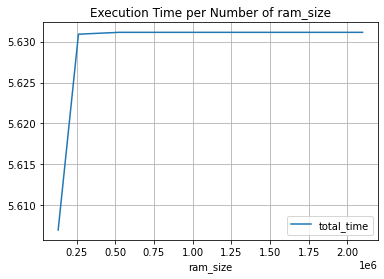

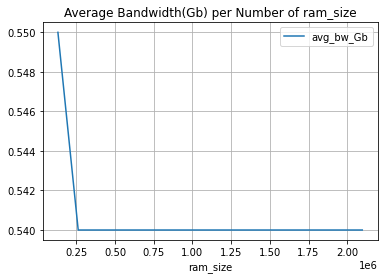

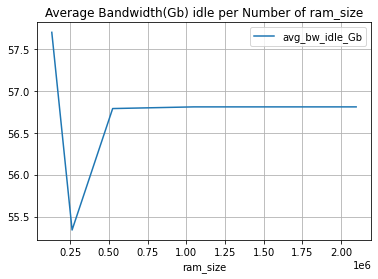

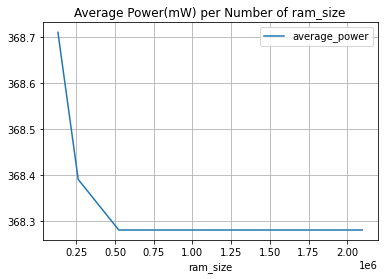

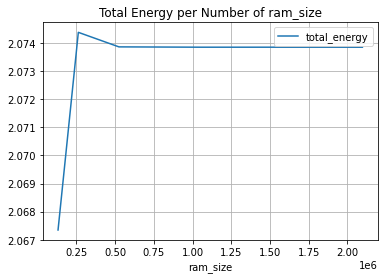

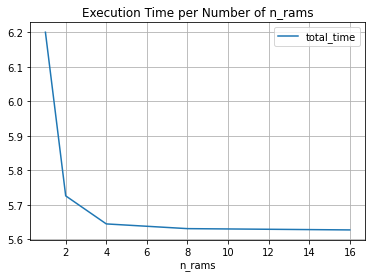

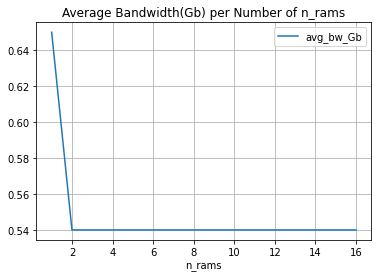

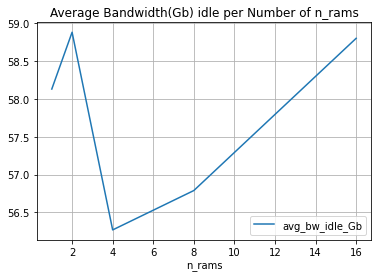

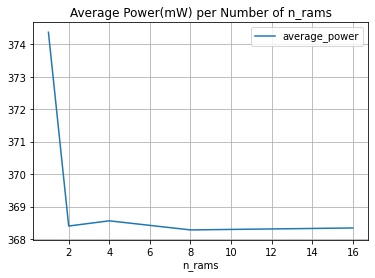

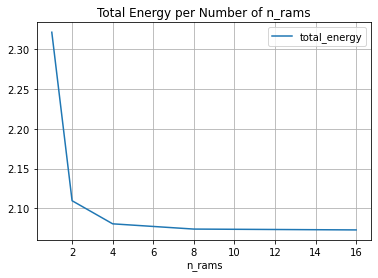

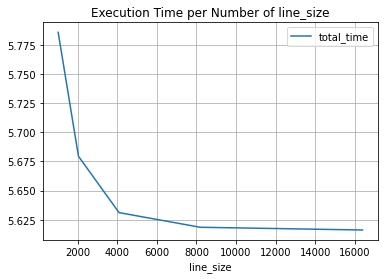

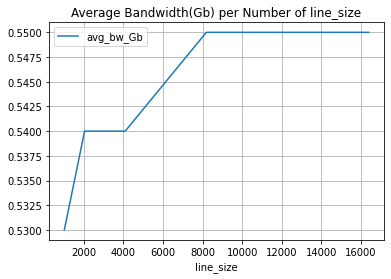

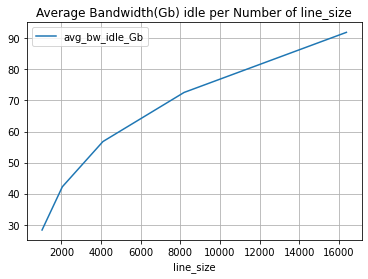

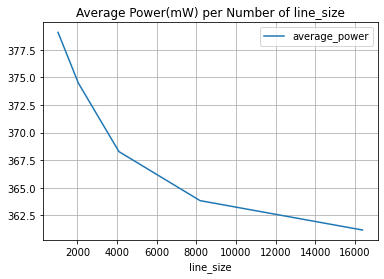

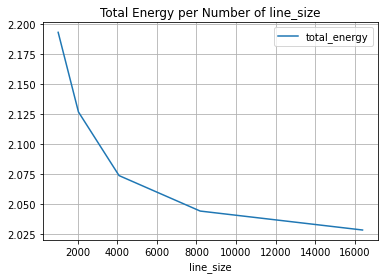

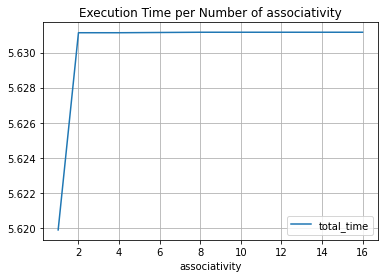

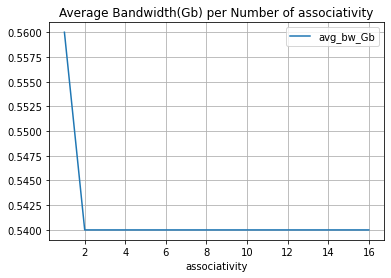

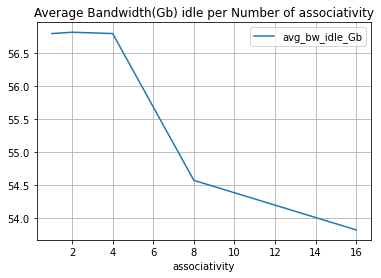

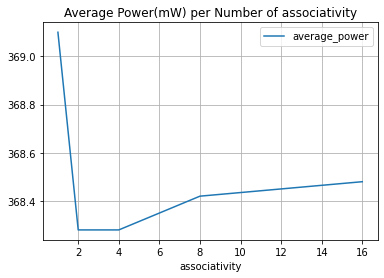

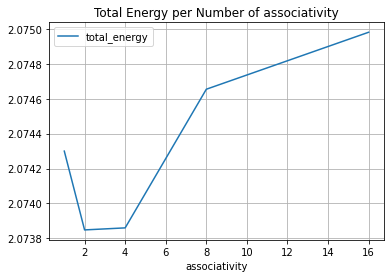

In [10]:
for input_file in input_files:
    default_file, main_file, file_list = start(input_file, paths_file)
    for file in file_list:
        run_cnn(file)
        conv_trace(file)
        run_dramsys(file)
        run_parser(file)
    group(file_list)
    plot(main_file)
